In [129]:
import pandas as pd
import seaborn as sns

In [130]:
df = pd.read_csv("youtube_influencers_data_cleaned.csv")
df.head()

,Video Views,Video Title,Channel URL,Creator Name,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,Date of Video Upload,...,Log No of Videos the Channel,Log No of Playlist,Log Community Engagement (Posts per week),Log Video Views Bucket,Like Score,Comment Score,Mean Log Views Until Then,Loyalty Score,Atractness Score,Efficiency Score
0,246636162,Me at the zoo,https://www.youtube.com/c/jawed,Jawed,Male,3110000.0,2.448498e+08,00:00:19,19.0,2005-04-24,...,0.000000,NaN,NaN,Bucket 6,0.843557,0.840194,19.323425,1.292525,1.292039,inf
1,4308230,A Message From Chad and Steve,https://www.youtube.com/c/youtube,YouTube,NaN,33600000.0,2.772516e+10,00:01:36,96.0,2006-10-10,...,6.300786,NaN,2.890372,Bucket 4,0.667948,0.574252,15.276038,0.881478,1.387510,3.816287
2,19897294,Drug problems,https://www.youtube.com/user/JAM05028,Jam05028,Male,211000.0,3.369131e+07,00:05:07,307.0,2007-10-28,...,4.382027,1.94591,NaN,Bucket 5,0.734605,0.510740,16.806094,1.370850,1.413809,3.955419
3,1751708,YouTube Captions and Subtitles,https://www.youtube.com/c/youtube,YouTube,NaN,33600000.0,2.772516e+10,00:01:36,96.0,2008-09-22,...,6.300786,NaN,2.890372,Bucket 4,0.573365,NaN,14.826070,0.855513,1.387510,3.816287
4,151671688,Seaworld SHAMU Killer Whale Show,https://www.youtube.com/c/videotragic,Videotragic,NaN,405000.0,1.515964e+08,00:09:53,593.0,2009-07-18,...,2.708050,NaN,NaN,Bucket 5,0.728467,0.551478,18.837229,1.458934,1.458895,6.955828


In [131]:
df.columns

Index(['Video Views', 'Video Title', 'Channel URL', 'Creator Name',
       'Creator Gender', 'Total Channel Subcribers', 'Total Chanel Views',
       'Duration of Video', 'Duration in Seconds', 'Date of Video Upload',
       'No of Likes', 'Language of the Video', 'Subtitle', 'Video Description',
       'Hashtags', 'No of Comments', 'Date of the Last Comment',
       'Maximum Quality of the Video', 'No of Videos the Channel',
       'No of Playlist', 'Premiered or Not',
       'Community Engagement (Posts per week)', 'Log Video Views',
       'Log Total Channel Subcribers', 'Log Total Chanel Views',
       'Log Duration in Seconds', 'Log No of Likes', 'Log Hashtags',
       'Log No of Comments', 'Log Maximum Quality of the Video',
       'Log No of Videos the Channel', 'Log No of Playlist',
       'Log Community Engagement (Posts per week)', 'Log Video Views Bucket',
       'Like Score', 'Comment Score', 'Mean Log Views Until Then',
       'Loyalty Score', 'Atractness Score', 'Efficien

In [132]:
numeric_log_columns = ['Log Video Views',
 'Log Total Channel Subcribers',
 'Log Total Chanel Views',
 'Log Duration in Seconds',
 'Log No of Likes',
 'Log Hashtags',
 'Log No of Comments',
 'Log Maximum Quality of the Video',
 'Log No of Videos the Channel',
 'Log No of Playlist',
 'Log Community Engagement (Posts per week)',
 'Like Score',
 'Comment Score',
 'Mean Log Views Until Then',
 'Loyalty Score',
 'Atractness Score',
 'Efficiency Score']

In [133]:
#sns.pairplot(df[columns], diag_kind='kde', markers='o', plot_kws={'alpha': 0.5})

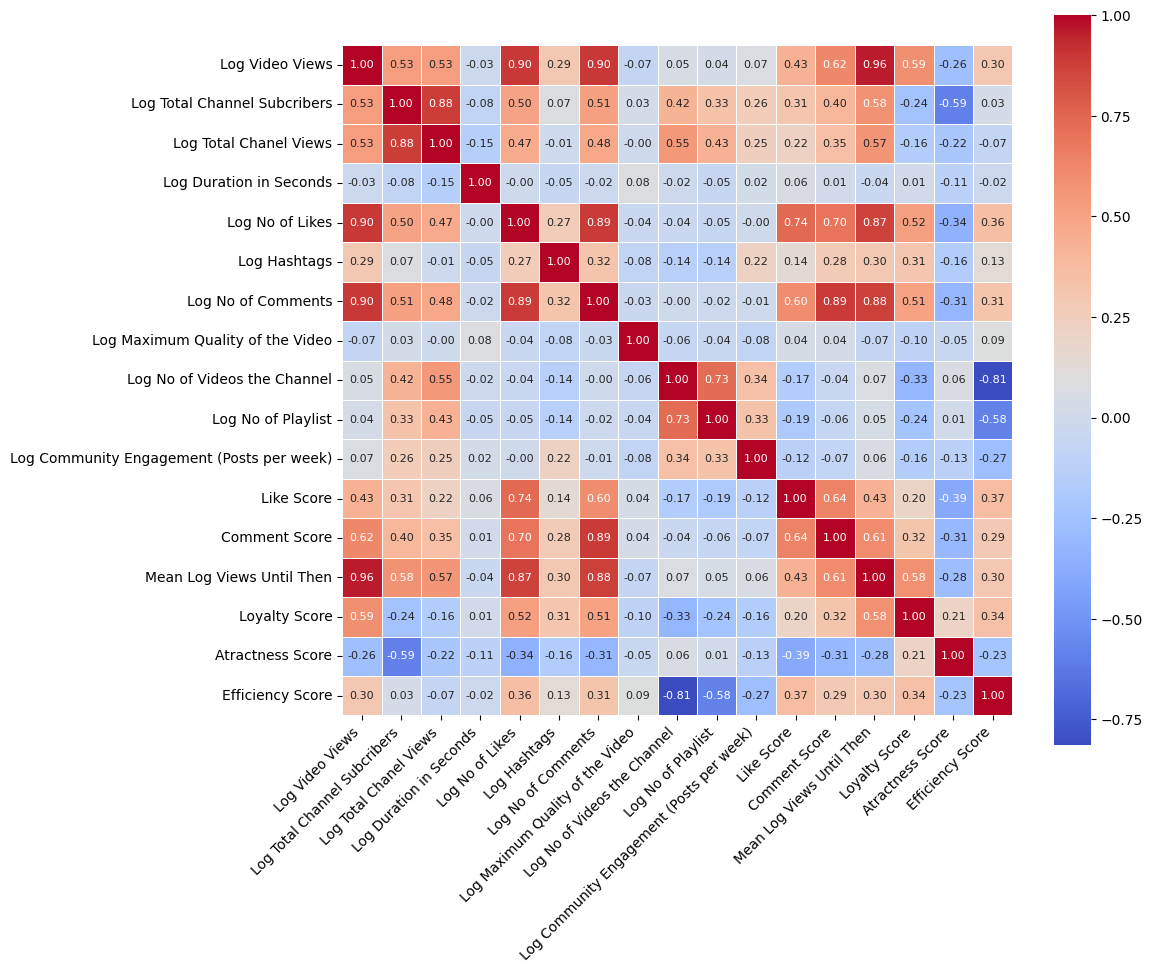

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # Increase figure size for better fit

corr_matrix = df[numeric_log_columns].corr(method='spearman')

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": 1},
    linewidths=0.5,  # optional, to separate cells clearly
    annot_kws={"size": 8}  # reduce annotation font size if crowded
)

plt.xticks(rotation=45, ha='right')  # rotate x labels to avoid overlap
plt.yticks(rotation=0)  # keep y labels horizontal
plt.tight_layout()  # adjust layout so labels fit

plt.show()


In [135]:
log_reg_columns = ["Log Video Views Bucket",
 'Log Total Channel Subcribers',
 'Log Total Chanel Views',
 'Log Duration in Seconds',
 'Log Maximum Quality of the Video',
 'Log No of Videos the Channel',
 'Log No of Playlist',
 'Loyalty Score',
 'Atractness Score',
 'Efficiency Score']

In [136]:
df['Log Video Views Bucket'].groupby(df['Log Video Views Bucket']).count()

Log Video Views Bucket
Bucket 1        28
Bucket 2       136
Bucket 3       285
Bucket 4       279
Bucket 5       136
Bucket 6        22
Outside IQR      5
Name: Log Video Views Bucket, dtype: int64

In [137]:
df['Estimated Bucket'] = df['Log Video Views Bucket'].apply(lambda x: 1 if x == 'Bucket 5' or x == 'Bucket 4' else 0)
df.head()   

,Video Views,Video Title,Channel URL,Creator Name,Creator Gender,Total Channel Subcribers,Total Chanel Views,Duration of Video,Duration in Seconds,Date of Video Upload,...,Log No of Playlist,Log Community Engagement (Posts per week),Log Video Views Bucket,Like Score,Comment Score,Mean Log Views Until Then,Loyalty Score,Atractness Score,Efficiency Score,Estimated Bucket
0,246636162,Me at the zoo,https://www.youtube.com/c/jawed,Jawed,Male,3110000.0,2.448498e+08,00:00:19,19.0,2005-04-24,...,NaN,NaN,Bucket 6,0.843557,0.840194,19.323425,1.292525,1.292039,inf,0
1,4308230,A Message From Chad and Steve,https://www.youtube.com/c/youtube,YouTube,NaN,33600000.0,2.772516e+10,00:01:36,96.0,2006-10-10,...,NaN,2.890372,Bucket 4,0.667948,0.574252,15.276038,0.881478,1.387510,3.816287,1
2,19897294,Drug problems,https://www.youtube.com/user/JAM05028,Jam05028,Male,211000.0,3.369131e+07,00:05:07,307.0,2007-10-28,...,1.94591,NaN,Bucket 5,0.734605,0.510740,16.806094,1.370850,1.413809,3.955419,1
3,1751708,YouTube Captions and Subtitles,https://www.youtube.com/c/youtube,YouTube,NaN,33600000.0,2.772516e+10,00:01:36,96.0,2008-09-22,...,NaN,2.890372,Bucket 4,0.573365,NaN,14.826070,0.855513,1.387510,3.816287,1
4,151671688,Seaworld SHAMU Killer Whale Show,https://www.youtube.com/c/videotragic,Videotragic,NaN,405000.0,1.515964e+08,00:09:53,593.0,2009-07-18,...,NaN,NaN,Bucket 5,0.728467,0.551478,18.837229,1.458934,1.458895,6.955828,1


In [138]:
df['Estimated Bucket'].groupby(df['Estimated Bucket']).count()

Estimated Bucket
0    490
1    415
Name: Estimated Bucket, dtype: int64

In [139]:
df[log_reg_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Log Video Views Bucket            891 non-null    object 
 1   Log Total Channel Subcribers      903 non-null    float64
 2   Log Total Chanel Views            896 non-null    float64
 3   Log Duration in Seconds           904 non-null    float64
 4   Log Maximum Quality of the Video  905 non-null    float64
 5   Log No of Videos the Channel      905 non-null    float64
 6   Log No of Playlist                851 non-null    float64
 7   Loyalty Score                     903 non-null    float64
 8   Atractness Score                  894 non-null    float64
 9   Efficiency Score                  896 non-null    float64
dtypes: float64(9), object(1)
memory usage: 70.8+ KB


In [140]:
reg_data = df[["Estimated Bucket",
 'Log Total Channel Subcribers',
 'Log Total Chanel Views',
 'Log Duration in Seconds',
 'Log Maximum Quality of the Video',
 'Log No of Videos the Channel',
 'Log No of Playlist',
 'Loyalty Score',
 'Atractness Score',
 'Efficiency Score']].copy()

In [141]:
reg_data.dropna(inplace=True)
reg_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 839 entries, 2 to 904
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Estimated Bucket                  839 non-null    int64  
 1   Log Total Channel Subcribers      839 non-null    float64
 2   Log Total Chanel Views            839 non-null    float64
 3   Log Duration in Seconds           839 non-null    float64
 4   Log Maximum Quality of the Video  839 non-null    float64
 5   Log No of Videos the Channel      839 non-null    float64
 6   Log No of Playlist                839 non-null    float64
 7   Loyalty Score                     839 non-null    float64
 8   Atractness Score                  839 non-null    float64
 9   Efficiency Score                  839 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 72.1 KB


In [142]:
y = reg_data["Estimated Bucket"]
X = reg_data[[
 'Log Total Channel Subcribers',
 'Log Total Chanel Views',
 'Log Duration in Seconds',
 'Log Maximum Quality of the Video',
 'Log No of Videos the Channel',
 'Log No of Playlist',
 'Loyalty Score',
 'Atractness Score',
 'Efficiency Score']]

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# X: özellik matrisi, y: hedef değişken
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Tahmin
y_pred = model.predict(X_test)


In [144]:
y_train.value_counts()


Estimated Bucket
0    358
1    313
Name: count, dtype: int64

In [145]:
y_test.value_counts()


Estimated Bucket
0    97
1    71
Name: count, dtype: int64

In [146]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Skorlar
print("Accuracy       :", accuracy_score(y_test, y_pred))
print("Precision      :", precision_score(y_test, y_pred))
print("Recall         :", recall_score(y_test, y_pred))
print("F1 Score       :", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy       : 0.875
Precision      : 0.8289473684210527
Recall         : 0.8873239436619719
F1 Score       : 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        97
           1       0.83      0.89      0.86        71

    accuracy                           0.88       168
   macro avg       0.87      0.88      0.87       168
weighted avg       0.88      0.88      0.88       168



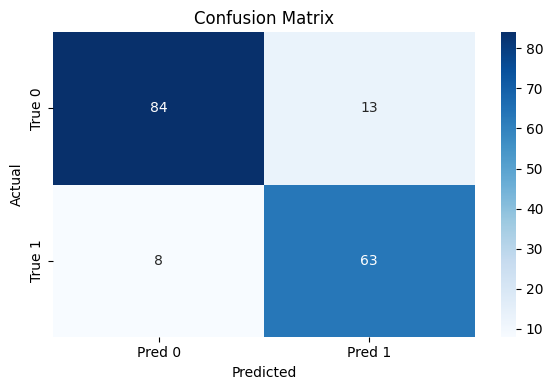

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


#### Confusion Matrix

Model dengeli şekilde hem pozitif hem negatif sınıfları ayırmış, çok düşük bir hata oranı yok.



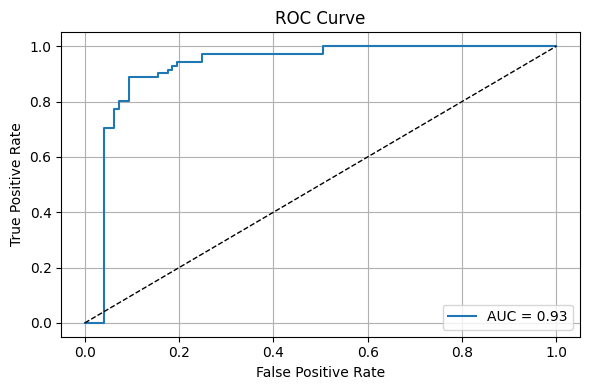

In [158]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1]  # 1 sınıfı olasılıkları
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


#### ROC Curve
- ROC eğrisi, modelin farklı eşik değerlerinde True Positive Rate ve False Positive Rate ilişkisini gösterir.
- AUC (Area Under Curve) 0.91, bu çok yüksek bir değer.
Yorum: Modelin rastgele tahminden çok daha iyi ayırıcı gücü var.
    - AUC=0.5: Rastgele model
    - AUC=1: Mükemmel model
    - AUC>0.9: Çok iyi

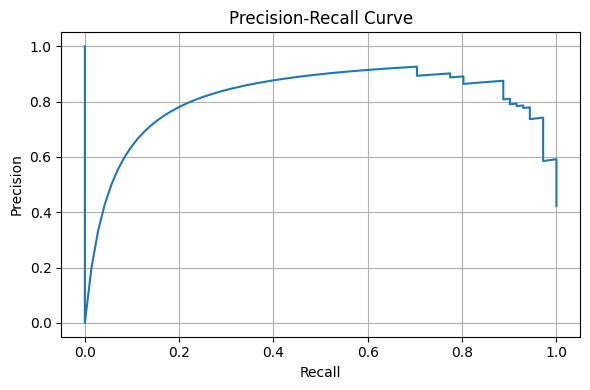

In [149]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Precision-Recall Curve
- Eğri oldukça yukarıda konumlanmış, Precision yüksek.
- Recall arttıkça Precision bir miktar düşüyor, bu beklenen bir durum.
- Özellikle pozitif sınıf daha önemliyse bu eğri, ROC eğrisinden daha anlamlı bir ölçü olur.
- Eğri formu modelin yüksek tutarlılıkla pozitif sınıfı yakaladığını gösteriyor.

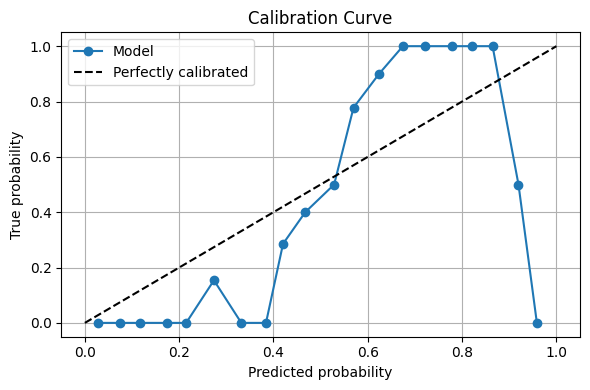

In [150]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=20)

plt.figure(figsize=(6,4))
plt.plot(prob_pred, prob_true, marker='o', label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Calibration Curve

- Düşük ve orta skorlarda kalibrasyon iyi.
- Orta-yüksek skorlarda model çoğu zaman doğru olasılık tahmini yapmış.
- En yüksek skorlarda (0.9+) modelin aşırı güvenli tahmini hatalı (false positive) çıkmış.

In [151]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss

# Kalibrasyonlu model (Platt Scaling için method='sigmoid')
calibrated_clf_platt = CalibratedClassifierCV(model, method='sigmoid', cv=7)
calibrated_clf_platt.fit(X_train, y_train)

# Kalibrasyonlu model (Isotonic Regression için method='isotonic')
calibrated_clf_iso = CalibratedClassifierCV(model, method='isotonic', cv=7)
calibrated_clf_iso.fit(X_train, y_train)

# Olasılık tahminleri al
probs_platt = calibrated_clf_platt.predict_proba(X_test)[:, 1]
probs_iso = calibrated_clf_iso.predict_proba(X_test)[:, 1]

# Performans ölç (Brier score kalibrasyon doğruluğu için yaygın)
print("Brier score Platt:", brier_score_loss(y_test, probs_platt))
print("Brier score Isotonic:", brier_score_loss(y_test, probs_iso))

Brier score Platt: 0.11677444699439718
Brier score Isotonic: 0.09794385884029932


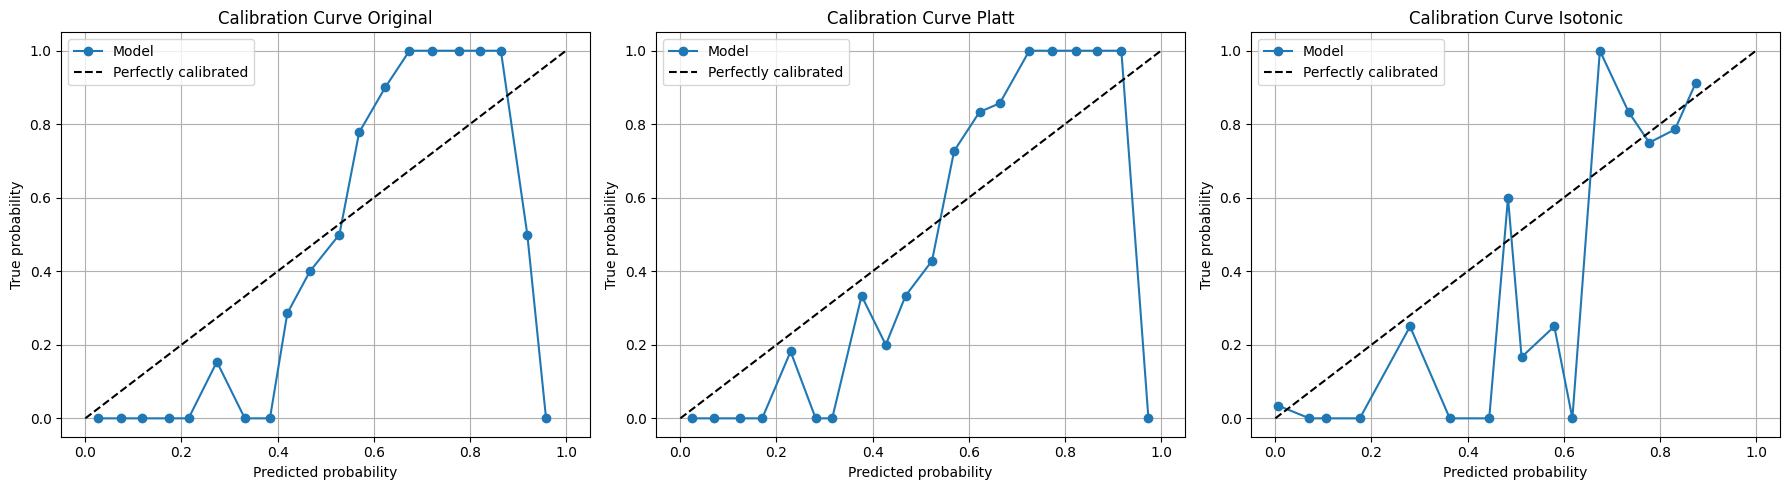

In [152]:
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve

# Compute calibration curves
prob_true_platt, prob_pred_platt = calibration_curve(y_test, probs_platt, n_bins=20)
prob_true_iso, prob_pred_iso = calibration_curve(y_test, probs_iso, n_bins=20)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original model calibration curve
axes[0].plot(prob_pred, prob_true, marker='o', label='Model')
axes[0].plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
axes[0].set_xlabel('Predicted probability')
axes[0].set_ylabel('True probability')
axes[0].set_title('Calibration Curve Original')
axes[0].legend()
axes[0].grid(True)

# Platt calibration curve
axes[1].plot(prob_pred_platt, prob_true_platt, marker='o', label='Model')
axes[1].plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
axes[1].set_xlabel('Predicted probability')
axes[1].set_ylabel('True probability')
axes[1].set_title('Calibration Curve Platt')
axes[1].legend()
axes[1].grid(True)

# Isotonic calibration curve
axes[2].plot(prob_pred_iso, prob_true_iso, marker='o', label='Model')
axes[2].plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
axes[2].set_xlabel('Predicted probability')
axes[2].set_ylabel('True probability')
axes[2].set_title('Calibration Curve Isotonic')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


In [153]:
y_pred_platt = calibrated_clf_platt.predict(X_test)

print("Accuracy       :", accuracy_score(y_test, y_pred_platt))
print("Precision      :", precision_score(y_test, y_pred_platt))
print("Recall         :", recall_score(y_test, y_pred_platt))
print("F1 Score       :", f1_score(y_test, y_pred_platt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_platt))


Accuracy       : 0.875
Precision      : 0.8289473684210527
Recall         : 0.8873239436619719
F1 Score       : 0.8571428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        97
           1       0.83      0.89      0.86        71

    accuracy                           0.88       168
   macro avg       0.87      0.88      0.87       168
weighted avg       0.88      0.88      0.88       168



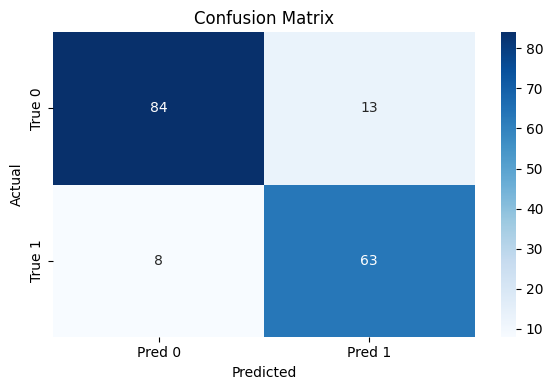

In [154]:
cm = confusion_matrix(y_test, y_pred_platt)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


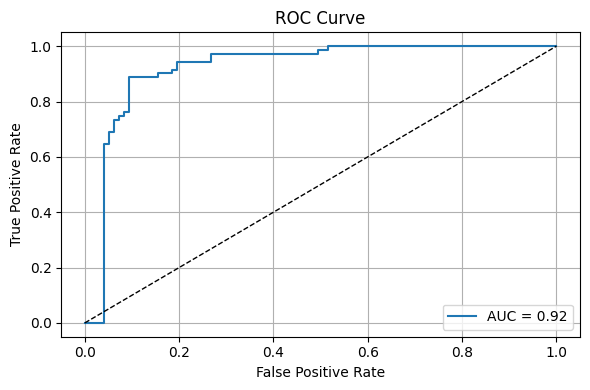

In [160]:
y_prob = calibrated_clf_platt.predict_proba(X_test)[:, 1]  # 1 sınıfı olasılıkları
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


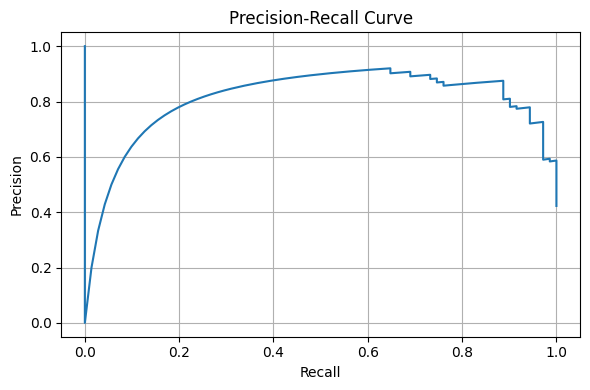

In [161]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.tight_layout()
plt.show()